In [1]:
import sys
import os
os.chdir(os.path.dirname(os.getcwd()))
print("Current working directory:", os.getcwd())

from OptimisationScripts.OptimisationModel import OptimModel
from PreOptimisationDataStore.DefaultParameters import Default_Params
from StochasticScripts.ParetoFronts import ParetoFront
from StochasticScripts.Dinkelbach import Dinkelbach
import numpy as np
from os import getcwd, chdir, environ, popen,system
from dill import dump   
import time
print("Gurobi version:", popen('gurobi_cl --version').read())


Current working directory: /rds/general/user/cja119/home/StochasticOperationsModel
Gurobi version: Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
Copyright (c) 2020, Gurobi Optimization, LLC



loaded recognised as dict
17542 672
Setup Model completed in 1.97 seconds
Model Built in 55.62 seconds
<class 'pyomo.core.base.PyomoModel.ConcreteModel'>
<class 'pyomo.core.base.PyomoModel.ConcreteModel'>
Using license file /apps/gurobi/8.1.1/gurobi.lic
Set parameter TokenServer to value gurobi.cc.ic.ac.uk
Read LP format model from file /var/tmp/pbs.462799.pbs/tmpy4a_lfy3.pyomo.lp
Reading time = 0.51 seconds
x1: 55380 rows, 43647 columns, 172087 nonzeros
Changed value of parameter FeasibilityTol to 1e-05
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
Changed value of parameter Seed to 42
   Prev: 0  Min: 0  Max: 2000000000  Default: 0
Changed value of parameter OptimalityTol to 1e-05
   Prev: 1e-06  Min: 1e-09  Max: 0.01  Default: 1e-06
Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Parameter LogToConsole unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter LogFile to NH3_Grid_Cost_Wind_13_.log
   Prev:   De

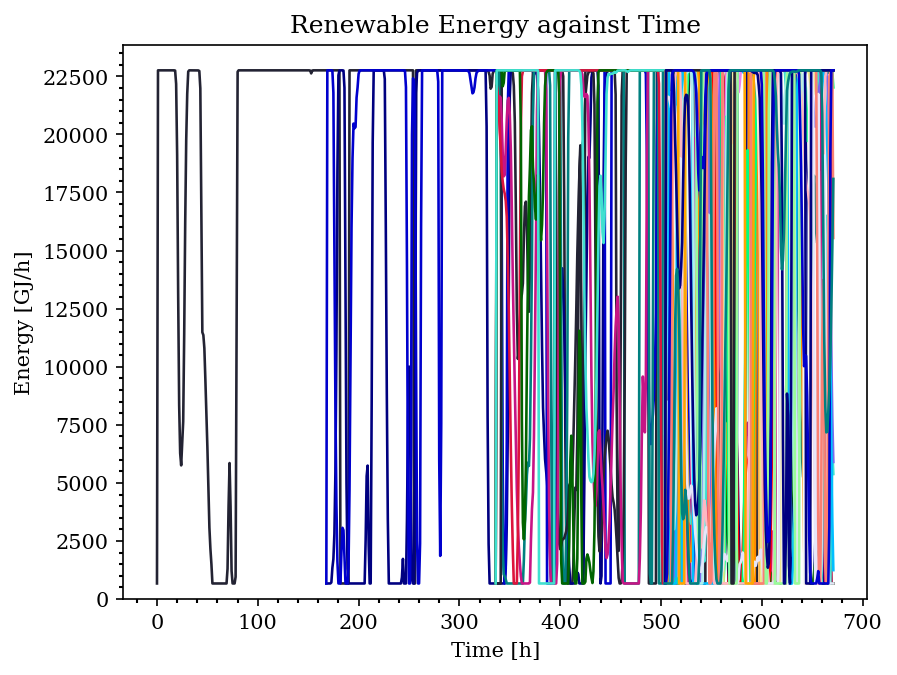

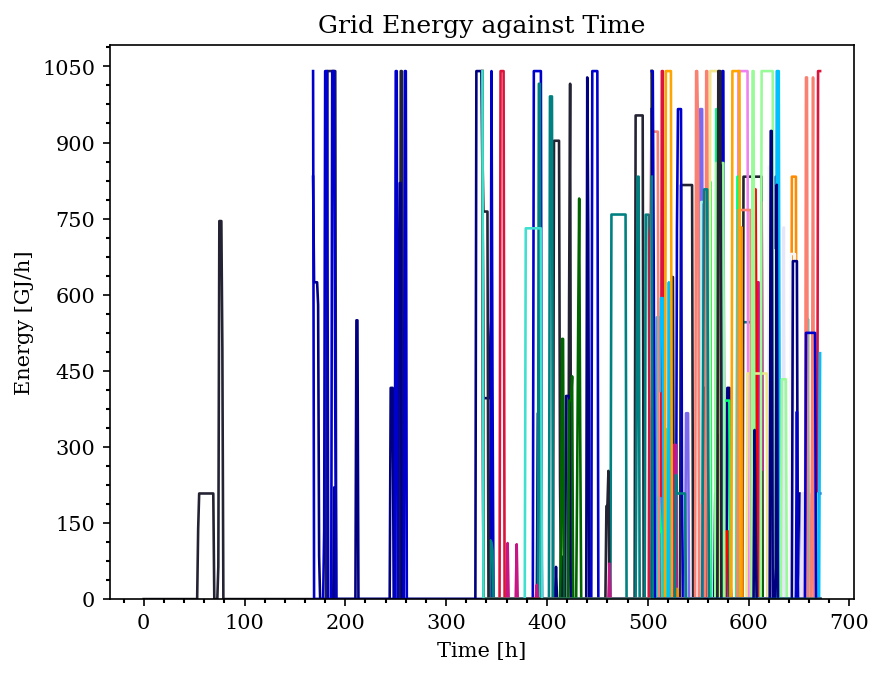

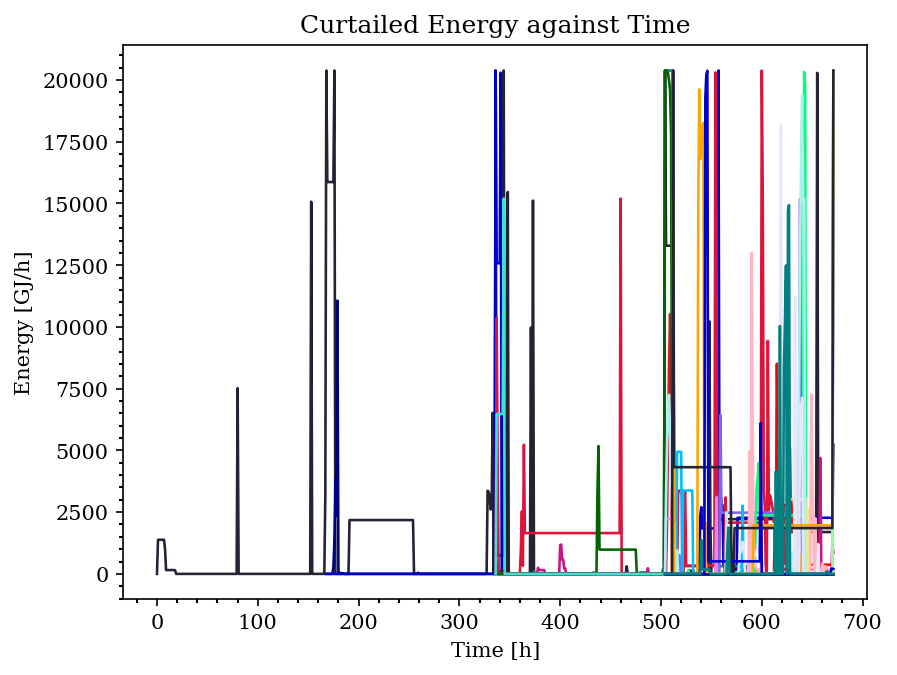

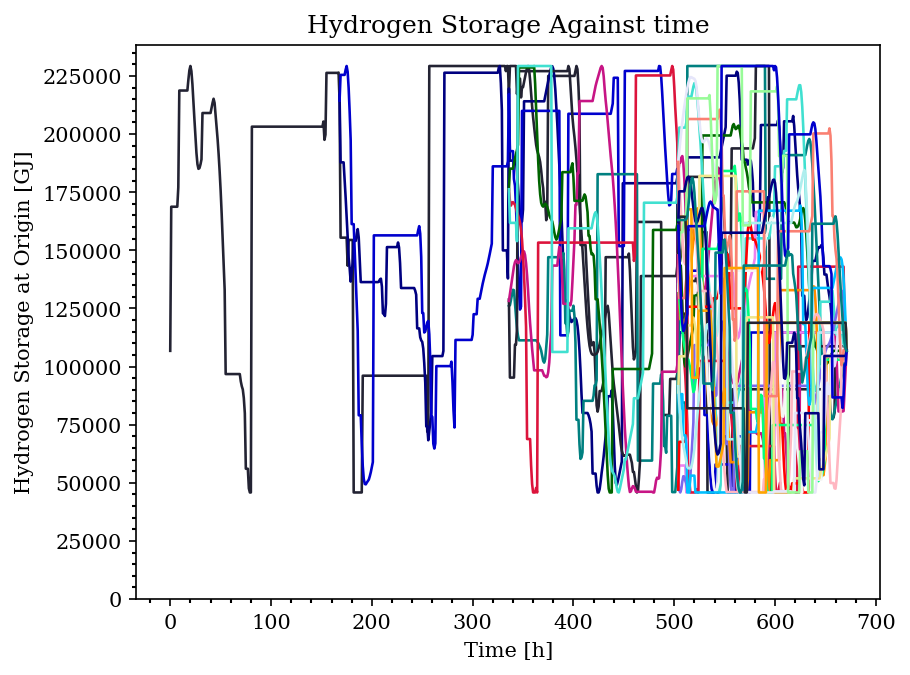

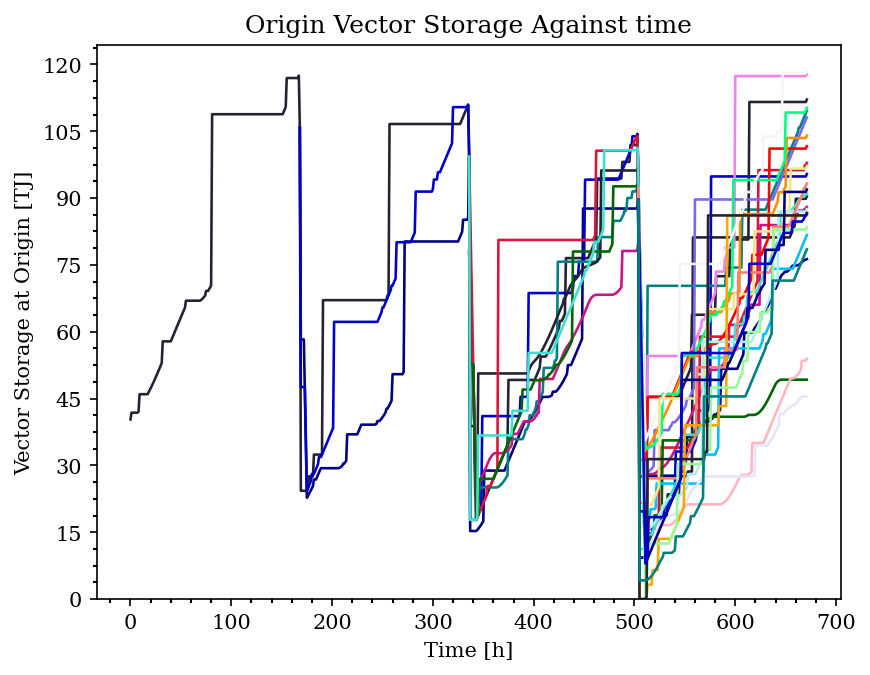

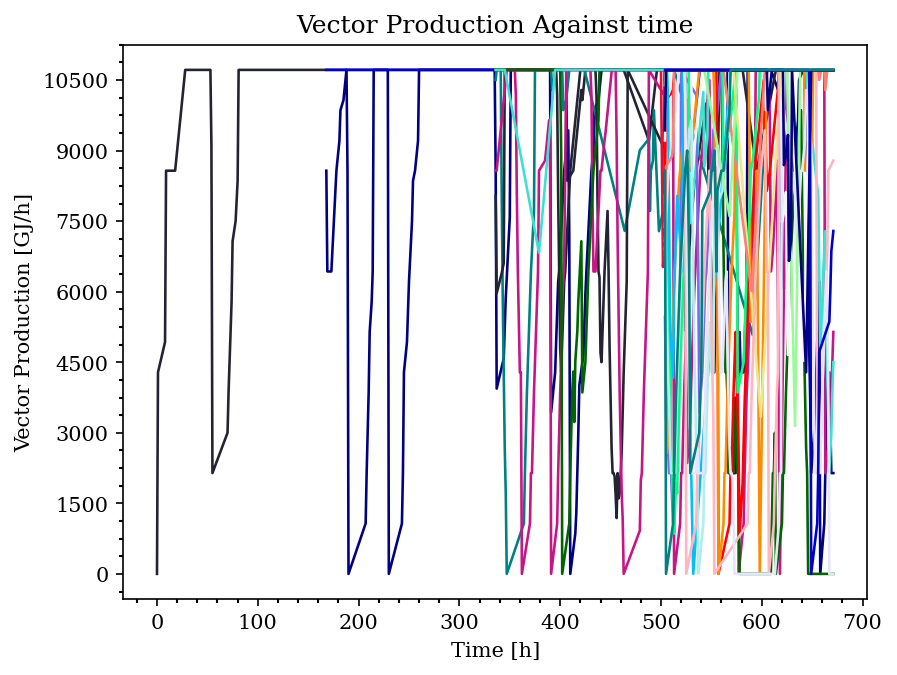

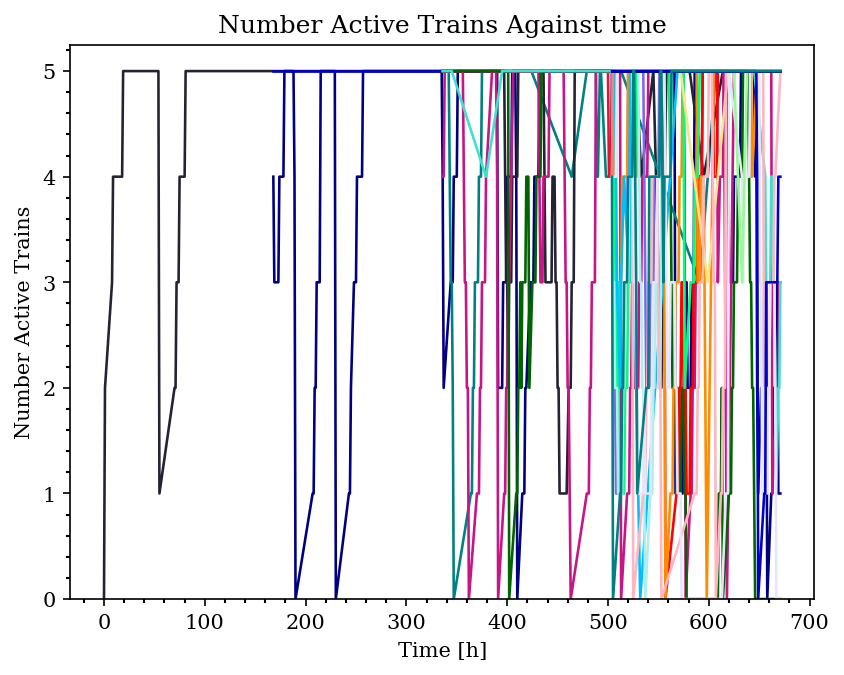

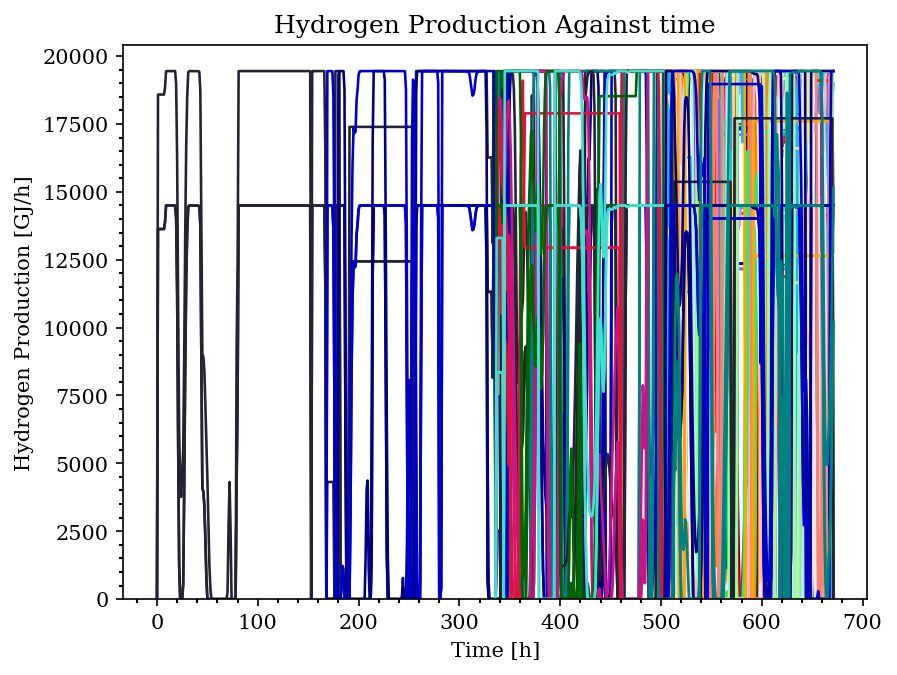

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


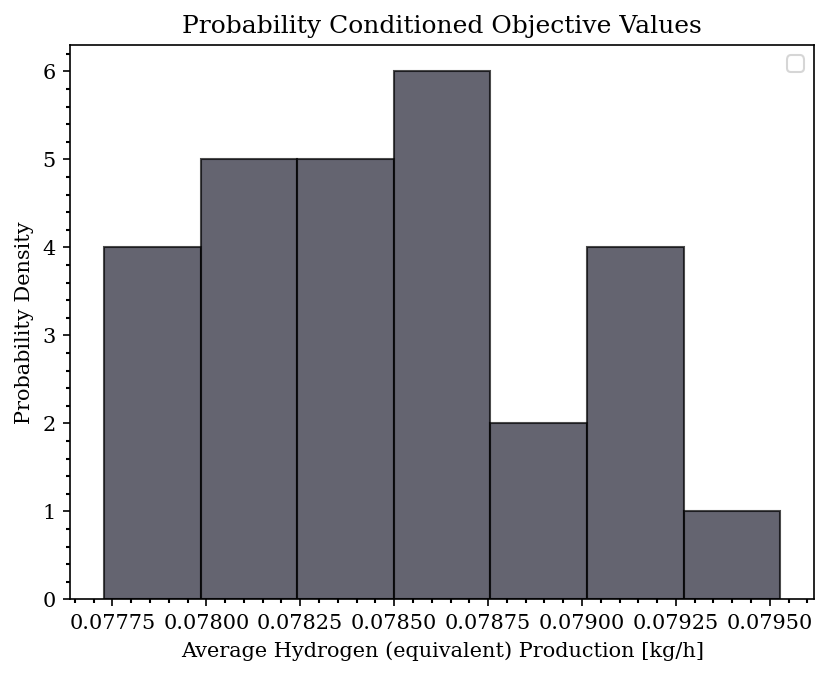

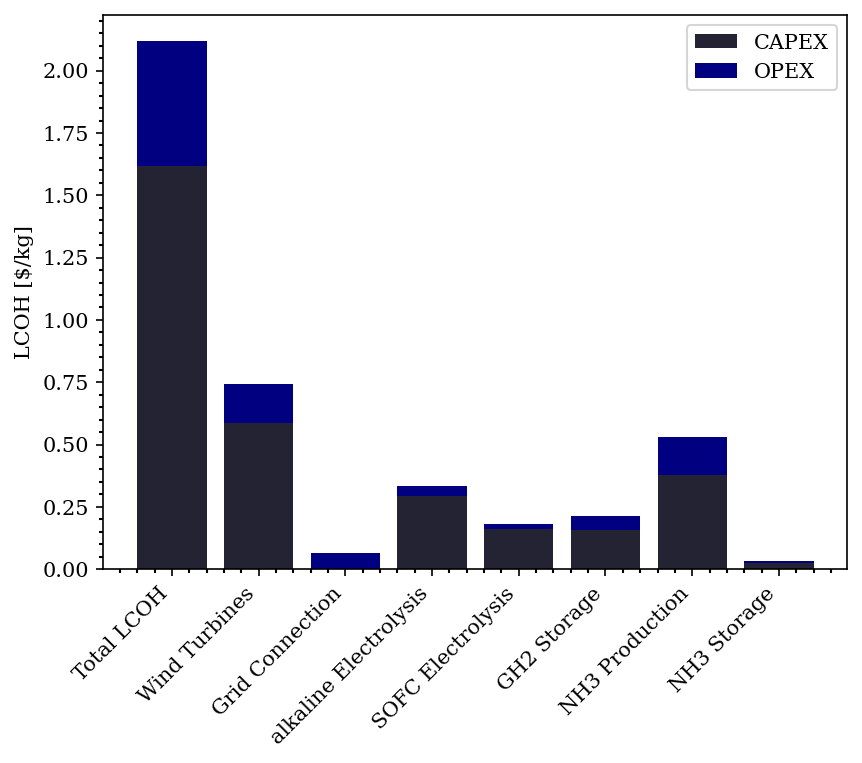

In [2]:
booleans = {'vector_choice':{'LH2':False,
                                'NH3':True
                                },
                'electrolysers':{'alkaline':True,
                                'PEM':True,
                                'SOFC':True
                                },
                'grid_connection':True,
                'wind':False,
                'solar':True,
                'net_present_value': True,
                'grid_wheel':False}

parameters = Default_Params().formulation_parameters
parameters['booleans'] = booleans
parameters['stage_duration'] = 168
parameters['n_stages'] = 3
parameters['hydrogen_price'] = 2#$/kg
parameters['wheel_period'] = 24
parameters['n_stochastics'] = 3
parameters['random_seed'] = 24235
parameters['vector_operating_duration'] = 1
parameters['shipping_decision'] = 168
parameters['relaxed_ramping'] = True # Relaxed ramping denotes whether you enforce the ramp/up down limits at the boundary or over the duration
key = 'NH3_Grid_Cost_Wind_13_'
#model = OptimModel(parameters, key=key)
#model = OptimModel.get_solve(key=key,reinitialise=True)
#pareto = ParetoFront(model,'hydrogen_price',[1,2,3,4,5,6,7,8,9,10])
model = OptimModel.class_solve(key=key,feasibility=0.00001, optimality=1e-5,mip_percentage=5)
#Dinkelbach.warm_start(key,parameters,)
model.generate_plots(model)

In [3]:
model.instance.grid_energy_factor.pprint()

grid_energy_factor : Size=1, Index=None, Domain=Any, Default=None, Mutable=True
    Key  : Value
    None :  25.0
